In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import json
import platform
import time
import pathlib
import os
import csv
import json

In [4]:
'''

# Function to convert a CSV to JSON
# Takes the file paths as arguments
def make_json(csvFilePath, jsonFilePath):
	
	# create a dictionary
	data = {}
	
	# Open a csv reader called DictReader
	with open(csvFilePath, encoding='utf-8') as csvf:
		csvReader = csv.DictReader(csvf)
		
		# Convert each row into a dictionary
		# and add it to data
		for rows in csvReader:
			
			# Assuming a column named 'No' to
			# be the primary key
			key = rows['id']
			data[key] = rows

	# Open a json writer, and use the json.dumps()
	# function to dump data
	with open(jsonFilePath, 'w', encoding='utf-8') as jsonf:
		jsonf.write(json.dumps(data, indent=4))
		
# Driver Code

# Decide the two file paths according to your
# computer system
csvFilePath = r'PATH'
jsonFilePath = r'PATH'

# Call the make_json function
make_json(csvFilePath, jsonFilePath)
'''

"\n\n# Function to convert a CSV to JSON\n# Takes the file paths as arguments\ndef make_json(csvFilePath, jsonFilePath):\n\t\n\t# create a dictionary\n\tdata = {}\n\t\n\t# Open a csv reader called DictReader\n\twith open(csvFilePath, encoding='utf-8') as csvf:\n\t\tcsvReader = csv.DictReader(csvf)\n\t\t\n\t\t# Convert each row into a dictionary\n\t\t# and add it to data\n\t\tfor rows in csvReader:\n\t\t\t\n\t\t\t# Assuming a column named 'No' to\n\t\t\t# be the primary key\n\t\t\tkey = rows['id']\n\t\t\tdata[key] = rows\n\n\t# Open a json writer, and use the json.dumps()\n\t# function to dump data\n\twith open(jsonFilePath, 'w', encoding='utf-8') as jsonf:\n\t\tjsonf.write(json.dumps(data, indent=4))\n\t\t\n# Driver Code\n\n# Decide the two file paths according to your\n# computer system\ncsvFilePath = r'D:\\MINI VI\testing I\\dataset\recipes\recipes.csv'\njsonFilePath = r'D:\\MINI VI\testing I\\dataset\\csv_json.json'\n\n# Call the make_json function\nmake_json(csvFilePath, jsonFilePa

In [5]:
'''
dataset = []

dataset_file_path = r'PATH'

with open(dataset_file_path) as dataset_file:
    json_data_dict = json.load(dataset_file) 
    json_data_list = list(json_data_dict.values())
    dict_keys = [key for key in json_data_list[0]]
    dict_keys.sort()
    dataset += json_data_list

    # This code block outputs the summary for each dataset.
print(dataset_file_path)
print('===========================================')
print('Number of examples: ', len(json_data_list), '\n')
print('Example object keys:\n', dict_keys, '\n')
print('Example object:\n', json_data_list[0], '\n')
print('Required keys:\n')
print('  title: ', json_data_list[1]['title'], '\n')
print('  ingredients: ', json_data_list[1]['ingredients'], '\n')
print('  instructions: ', json_data_list[1]['instructions'])
print('\n\n')

'''

"\ndataset = []\n\ndataset_file_path = r'D:\\MINI VI\testing I\\dataset\\csv_json.json'\n\nwith open(dataset_file_path) as dataset_file:\n    json_data_dict = json.load(dataset_file) \n    json_data_list = list(json_data_dict.values())\n    dict_keys = [key for key in json_data_list[0]]\n    dict_keys.sort()\n    dataset += json_data_list\n\n    # This code block outputs the summary for each dataset.\nprint(dataset_file_path)\nprint('===========================================')\nprint('Number of examples: ', len(json_data_list), '\n')\nprint('Example object keys:\n', dict_keys, '\n')\nprint('Example object:\n', json_data_list[0], '\n')\nprint('Required keys:\n')\nprint('  title: ', json_data_list[1]['title'], '\n')\nprint('  ingredients: ', json_data_list[1]['ingredients'], '\n')\nprint('  instructions: ', json_data_list[1]['instructions'])\nprint('\n\n')\n\n"

In [6]:
#dataset_raw = load_dataset() 

In [2]:
from csv import DictReader
# open file in read mode
with open("dataset", 'r',encoding='utf-8') as f:
     
    dict_reader = DictReader(f)
     
    dataset = list(dict_reader)
   
print(dataset[0])

{'id': '1', 'title': 'Masala Karela Recipe', 'ingredients': '1 tablespoon Red Chilli powder,3 tablespoon Gram flour (besan),2 teaspoons Cumin seeds (Jeera),1 tablespoon Coriander Powder (Dhania),2 teaspoons Turmeric powder (Haldi),Salt - to taste,1 tablespoon Amchur (Dry Mango Powder),6 Karela (Bitter Gourd/ Pavakkai) - deseeded,Sunflower Oil - as required,1 Onion - thinly sliced', 'instructions': 'To begin making the Masala Karela Recipe,de-seed the karela and slice.\nDo not remove the skin as the skin has all the nutrients.\nAdd the karela to the pressure cooker with 3 tablespoon of water, salt and turmeric powder and pressure cook for three whistles.\nRelease the pressure immediately and open the lids.\nKeep aside.Heat oil in a heavy bottomed pan or a kadhai.\nAdd cumin seeds and let it sizzle.Once the cumin seeds have sizzled, add onions and saute them till it turns golden brown in color.Add the karela, red chilli powder, amchur powder, coriander powder and besan.\nStir to combine 

In [8]:
print('Total number of raw examples: ', len(dataset))

Total number of raw examples:  5938


In [3]:
def recipe_validate_required_fields(recipe):
    required_keys = ['title', 'ingredients', 'instructions']
    
    if not recipe:
        return False
    
    for required_key in required_keys:
        if not recipe[required_key]:
            return False
        
        if type(recipe[required_key]) == list and len(recipe[required_key]) == 0:
            return False
    
    return True

In [4]:
dataset_validated = [recipe for recipe in dataset if recipe_validate_required_fields(recipe)]

print('Dataset size BEFORE validation', len(dataset))
print('Dataset size AFTER validation', len(dataset_validated))
print('Number of incomplete recipes', len(dataset) - len(dataset_validated))

Dataset size BEFORE validation 5938
Dataset size AFTER validation 5938
Number of incomplete recipes 0


In [5]:
STOP_WORD_TITLE = '📗 '
STOP_WORD_INGREDIENTS = '\n🥕\n\n'
STOP_WORD_INSTRUCTIONS = '\n📝\n\n'

In [6]:
print(dataset_validated[0])

{'id': '1', 'title': 'Masala Karela Recipe', 'ingredients': '1 tablespoon Red Chilli powder,3 tablespoon Gram flour (besan),2 teaspoons Cumin seeds (Jeera),1 tablespoon Coriander Powder (Dhania),2 teaspoons Turmeric powder (Haldi),Salt - to taste,1 tablespoon Amchur (Dry Mango Powder),6 Karela (Bitter Gourd/ Pavakkai) - deseeded,Sunflower Oil - as required,1 Onion - thinly sliced', 'instructions': 'To begin making the Masala Karela Recipe,de-seed the karela and slice.\nDo not remove the skin as the skin has all the nutrients.\nAdd the karela to the pressure cooker with 3 tablespoon of water, salt and turmeric powder and pressure cook for three whistles.\nRelease the pressure immediately and open the lids.\nKeep aside.Heat oil in a heavy bottomed pan or a kadhai.\nAdd cumin seeds and let it sizzle.Once the cumin seeds have sizzled, add onions and saute them till it turns golden brown in color.Add the karela, red chilli powder, amchur powder, coriander powder and besan.\nStir to combine 

In [7]:
def recipe_to_string(recipe):
    # This string is presented as a part of recipes so we need to clean it up.
    noize_string = 'ADVERTISEMENT'
    
    title = recipe['title']
    ingredients = recipe['ingredients'].split(',')
    instructions = recipe['instructions'].split('\n')
    
    ingredients_string = ''
    for ingredient in ingredients:
        ingredient = ingredient.replace(noize_string, '')
        if ingredient:
            ingredients_string += f'• {ingredient}\n'    # adding bullets to structure the data
    
    instructions_string = ''
    for instruction in instructions:
        instruction = instruction.replace(noize_string, '')
        if instruction:
            instructions_string += f'▪︎ {instruction}\n'    # adding bullets to structure the data
    
    return f'{STOP_WORD_TITLE}{title}\n{STOP_WORD_INGREDIENTS}{ingredients_string}{STOP_WORD_INSTRUCTIONS}{instructions_string}'


In [8]:
print(recipe_to_string(dataset_validated[0]))

📗 Masala Karela Recipe

🥕

• 1 tablespoon Red Chilli powder
• 3 tablespoon Gram flour (besan)
• 2 teaspoons Cumin seeds (Jeera)
• 1 tablespoon Coriander Powder (Dhania)
• 2 teaspoons Turmeric powder (Haldi)
• Salt - to taste
• 1 tablespoon Amchur (Dry Mango Powder)
• 6 Karela (Bitter Gourd/ Pavakkai) - deseeded
• Sunflower Oil - as required
• 1 Onion - thinly sliced

📝

▪︎ To begin making the Masala Karela Recipe,de-seed the karela and slice.
▪︎ Do not remove the skin as the skin has all the nutrients.
▪︎ Add the karela to the pressure cooker with 3 tablespoon of water, salt and turmeric powder and pressure cook for three whistles.
▪︎ Release the pressure immediately and open the lids.
▪︎ Keep aside.Heat oil in a heavy bottomed pan or a kadhai.
▪︎ Add cumin seeds and let it sizzle.Once the cumin seeds have sizzled, add onions and saute them till it turns golden brown in color.Add the karela, red chilli powder, amchur powder, coriander powder and besan.
▪︎ Stir to combine the masalas in

In [9]:
dataset_stringified = [recipe_to_string(recipe) for recipe in dataset_validated]
print('Stringified dataset size: ', len(dataset_stringified))

Stringified dataset size:  5938


In [10]:
for recipe_index, recipe_string in enumerate(dataset_stringified[:3]):
    print('Recipe #{}\n---------'.format(recipe_index + 1))
    print(recipe_string)
    print('\n')

Recipe #1
---------
📗 Masala Karela Recipe

🥕

• 1 tablespoon Red Chilli powder
• 3 tablespoon Gram flour (besan)
• 2 teaspoons Cumin seeds (Jeera)
• 1 tablespoon Coriander Powder (Dhania)
• 2 teaspoons Turmeric powder (Haldi)
• Salt - to taste
• 1 tablespoon Amchur (Dry Mango Powder)
• 6 Karela (Bitter Gourd/ Pavakkai) - deseeded
• Sunflower Oil - as required
• 1 Onion - thinly sliced

📝

▪︎ To begin making the Masala Karela Recipe,de-seed the karela and slice.
▪︎ Do not remove the skin as the skin has all the nutrients.
▪︎ Add the karela to the pressure cooker with 3 tablespoon of water, salt and turmeric powder and pressure cook for three whistles.
▪︎ Release the pressure immediately and open the lids.
▪︎ Keep aside.Heat oil in a heavy bottomed pan or a kadhai.
▪︎ Add cumin seeds and let it sizzle.Once the cumin seeds have sizzled, add onions and saute them till it turns golden brown in color.Add the karela, red chilli powder, amchur powder, coriander powder and besan.
▪︎ Stir to co

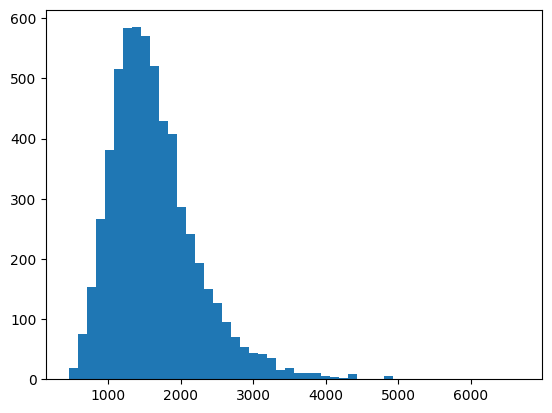

In [11]:
recipes_lengths = []
for recipe_text in dataset_stringified:
    recipes_lengths.append(len(recipe_text))

plt.hist(recipes_lengths, bins=50)
plt.show()

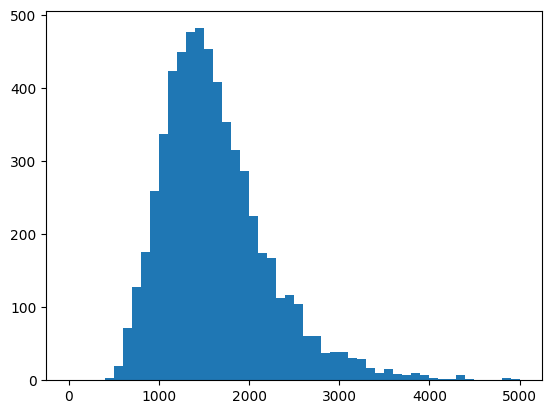

In [18]:
plt.hist(recipes_lengths, range=(0, 5000), bins=50)
plt.show()

In [12]:
MAX_RECIPE_LENGTH = 1900

def filter_recipes_by_length(recipe_test):
    return len(recipe_test) <= MAX_RECIPE_LENGTH 

dataset_filtered = [recipe_text for recipe_text in dataset_stringified if filter_recipes_by_length(recipe_text)]

print('Dataset size BEFORE filtering: ', len(dataset_stringified))
print('Dataset size AFTER filtering: ', len(dataset_filtered))
print('Number of eliminated recipes: ', len(dataset_stringified) - len(dataset_filtered)) 

Dataset size BEFORE filtering:  5938
Dataset size AFTER filtering:  4359
Number of eliminated recipes:  1579


In [13]:
TOTAL_RECIPES_NUM = len(dataset_filtered)

print('MAX_RECIPE_LENGTH: ', MAX_RECIPE_LENGTH)
print('TOTAL_RECIPES_NUM: ', TOTAL_RECIPES_NUM)

MAX_RECIPE_LENGTH:  1900
TOTAL_RECIPES_NUM:  4359


In [48]:
STOP_SIGN = '␣'

tokenizer = tf.keras.preprocessing.text.Tokenizer(filters=''''!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~''')

# Stop word is not a part of recipes, but tokenizer must know about it as well.
tokenizer.fit_on_texts([STOP_SIGN])

tokenizer.fit_on_texts(dataset_filtered)
#tok_data=tokenizer.fit_on_texts([dataset_filtered])
tokenizer.get_config()

{'num_words': None,
 'filters': '\'!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~',
 'lower': True,
 'split': ' ',
 'char_level': False,
 'oov_token': None,
 'document_count': 4360,
 'word_counts': '{"\\u2423": 1, "\\ud83d\\udcd7": 4359, "masala": 2619, "karela": 130, "recipe\\n\\n\\ud83e\\udd55\\n\\n\\u2022": 2628, "1": 29443, "tablespoon": 4492, "red": 4438, "chilli": 3432, "powder\\n\\u2022": 2774, "3": 4103, "gram": 778, "flour": 2039, "besan": 386, "\\n\\u2022": 8078, "2": 16694, "teaspoons": 1023, "cumin": 2818, "seeds": 4981, "jeera": 1448, "coriander": 3654, "powder": 7665, "dhania": 1558, "turmeric": 2719, "haldi": 1227, "salt": 7750, "to": 22501, "taste\\n\\u2022": 2867, "amchur": 186, "dry": 2338, "mango": 1004, "6": 828, "bitter": 144, "gourd": 524, "pavakkai": 41, "deseeded\\n\\u2022": 14, "sunflower": 1589, "oil": 5909, "as": 3654, "required\\n\\u2022": 632, "onion": 2929, "thinly": 271, "sliced\\n\\n\\ud83d\\udcdd\\n\\n\\u25aa\\ufe0e": 102, "begin": 3719, "making": 3629, "the": 53016,

In [22]:
#tok_data[:15]

In [49]:
VOCABULARY_SIZE = len(tokenizer.word_counts) + 1

print('VOCABULARY_SIZE: ', VOCABULARY_SIZE)

VOCABULARY_SIZE:  10517


In [50]:
for i in range(1,4361):
  print(tokenizer.index_word[i],end=" ")

the and 1 
▪︎ a to 2 add it with in for teaspoon recipe cup 
• salt powder of heat 4 serve oil water on minutes or cook seeds into leaves tablespoon chopped
• red green pan 📗 
 well 3 mix until is once dal begin coriander as making along chilli till keep garlic rice finely them make onion curry bowl taste
• all cumin you powder
• turmeric recipe

🥕

• masala your coconut tablespoons ginger aside turn off cooked dry now mixture mustard this pepper chopped stir pressure let about flour hot onions medium style 5 after black whole tomato take chillies paste 10 saute cut are lemon allow cups over oil
• some brown ingredients fry sunflower flame sugar chicken milk dhania will cloves little place jeera from can done seeds
• tomatoes chutney small grams cooker inch first fresh dough ghee batter cheese then at butter boil sauce haldi few wheat soft out meal by roasted taste they grated
• sprig cool salad potatoes if seconds spinach pour asafoetida bread juice cover teaspoons low ready yogurt ba

In [52]:
tokenizer.word_index['o']

4722

In [53]:
array_vocabulary = tokenizer.sequences_to_texts([[word_index] for word_index in range(VOCABULARY_SIZE)])
print([char for char in array_vocabulary])

['', 'the', 'and', '1', '\n▪︎', 'a', 'to', '2', 'add', 'it', 'with', 'in', 'for', 'teaspoon', 'recipe', 'cup', '\n•', 'salt', 'powder', 'of', 'heat', '4', 'serve', 'oil', 'water', 'on', 'minutes', 'or', 'cook', 'seeds', 'into', 'leaves', 'tablespoon', 'chopped\n•', 'red', 'green', 'pan', '📗', '\n', 'well', '3', 'mix', 'until', 'is', 'once', 'dal', 'begin', 'coriander', 'as', 'making', 'along', 'chilli', 'till', 'keep', 'garlic', 'rice', 'finely', 'them', 'make', 'onion', 'curry', 'bowl', 'taste\n•', 'all', 'cumin', 'you', 'powder\n•', 'turmeric', 'recipe\n\n🥕\n\n•', 'masala', 'your', 'coconut', 'tablespoons', 'ginger', 'aside', 'turn', 'off', 'cooked', 'dry', 'now', 'mixture', 'mustard', 'this', 'pepper', 'chopped', 'stir', 'pressure', 'let', 'about', 'flour', 'hot', 'onions', 'medium', 'style', '5', 'after', 'black', 'whole', 'tomato', 'take', 'chillies', 'paste', '10', 'saute', 'cut', 'are', 'lemon', 'allow', 'cups', 'over', 'oil\n•', 'some', 'brown', 'ingredients', 'fry', 'sunflower

In [54]:
tokenizer.texts_to_sequences(['📗 yes'])

[[37]]

In [55]:
dataset_vectorized = tokenizer.texts_to_sequences(dataset_filtered)

print('Vectorized dataset size', len(dataset_vectorized)) 

Vectorized dataset size 4359


In [56]:
dataset_vectorized[0]

[37,
 69,
 845,
 68,
 3,
 32,
 34,
 51,
 66,
 40,
 32,
 228,
 89,
 412,
 16,
 7,
 170,
 64,
 29,
 125,
 16,
 3,
 32,
 47,
 18,
 120,
 16,
 7,
 170,
 67,
 18,
 147,
 16,
 17,
 6,
 62,
 3,
 32,
 654,
 78,
 175,
 18,
 16,
 215,
 845,
 791,
 315,
 1533,
 2537,
 115,
 23,
 48,
 268,
 3,
 59,
 508,
 948,
 6,
 46,
 49,
 1,
 69,
 845,
 14,
 1179,
 701,
 1,
 845,
 2,
 470,
 4,
 397,
 230,
 179,
 1,
 450,
 48,
 1,
 450,
 345,
 63,
 1,
 4544,
 4,
 8,
 1,
 845,
 6,
 1,
 86,
 134,
 10,
 40,
 32,
 19,
 24,
 17,
 2,
 67,
 18,
 2,
 86,
 28,
 12,
 1191,
 328,
 4,
 337,
 1,
 86,
 473,
 2,
 399,
 1,
 7200,
 4,
 53,
 74,
 20,
 23,
 11,
 5,
 284,
 320,
 36,
 27,
 5,
 897,
 4,
 8,
 64,
 29,
 2,
 87,
 9,
 916,
 44,
 1,
 64,
 29,
 278,
 6130,
 8,
 91,
 2,
 103,
 57,
 52,
 9,
 346,
 186,
 112,
 11,
 655,
 8,
 1,
 845,
 34,
 51,
 18,
 654,
 18,
 47,
 18,
 2,
 412,
 4,
 85,
 6,
 198,
 1,
 1076,
 30,
 1,
 845,
 440,
 5,
 123,
 279,
 23,
 25,
 1,
 206,
 2,
 41,
 380,
 4,
 169,
 1,
 36,
 2,
 287,
 69,
 845,
 341,
 

In [57]:
def recipe_sequence_to_string(recipe_sequence):
    recipe_stringified = tokenizer.sequences_to_texts([recipe_sequence])[0]
    print(recipe_stringified)

recipe_sequence_to_string(dataset_vectorized[0])

📗 masala karela recipe

🥕

• 1 tablespoon red chilli powder
• 3 tablespoon gram flour besan 
• 2 teaspoons cumin seeds jeera 
• 1 tablespoon coriander powder dhania 
• 2 teaspoons turmeric powder haldi 
• salt to taste
• 1 tablespoon amchur dry mango powder 
• 6 karela bitter gourd pavakkai deseeded
• sunflower oil as required
• 1 onion thinly sliced

📝

▪︎ to begin making the masala karela recipe de seed the karela and slice 
▪︎ do not remove the skin as the skin has all the nutrients 
▪︎ add the karela to the pressure cooker with 3 tablespoon of water salt and turmeric powder and pressure cook for three whistles 
▪︎ release the pressure immediately and open the lids 
▪︎ keep aside heat oil in a heavy bottomed pan or a kadhai 
▪︎ add cumin seeds and let it sizzle once the cumin seeds have sizzled add onions and saute them till it turns golden brown in color add the karela red chilli powder amchur powder coriander powder and besan 
▪︎ stir to combine the masalas into the karela drizzle

In [58]:
for recipe_index, recipe in enumerate(dataset_vectorized[:10]):
    print('Recipe #{} length: {}'.format(recipe_index + 1, len(recipe)))

Recipe #1 length: 232
Recipe #2 length: 193
Recipe #3 length: 277
Recipe #4 length: 189
Recipe #5 length: 275
Recipe #6 length: 304
Recipe #7 length: 277
Recipe #8 length: 214
Recipe #9 length: 224
Recipe #10 length: 182


In [59]:
dataset_vectorized_padded_without_stops = tf.keras.preprocessing.sequence.pad_sequences(
    dataset_vectorized,
    padding='post',
    truncating='post',
    # We use -1 here and +1 in the next step to make sure
    # that all recipes will have at least 1 stops sign at the end,
    # since each sequence will be shifted and truncated afterwards
    # (to generate X and Y sequences).
    maxlen=MAX_RECIPE_LENGTH-1,
    value=tokenizer.texts_to_sequences([STOP_SIGN])[0]
)
print(dataset_vectorized_padded_without_stops[0][:15])

dataset_vectorized_padded = tf.keras.preprocessing.sequence.pad_sequences(
    dataset_vectorized_padded_without_stops,
    padding='post',
    truncating='post',
    maxlen=MAX_RECIPE_LENGTH+1,
    value=tokenizer.texts_to_sequences([STOP_SIGN])[0]
)
print(dataset_vectorized_padded[0][:17])

for recipe_index, recipe in enumerate(dataset_vectorized_padded[:10]):
    print('Recipe #{} length: {}'.format(recipe_index, len(recipe)))

[ 37  69 845  68   3  32  34  51  66  40  32 228  89 412  16]
[ 37  69 845  68   3  32  34  51  66  40  32 228  89 412  16   7 170]
Recipe #0 length: 1901
Recipe #1 length: 1901
Recipe #2 length: 1901
Recipe #3 length: 1901
Recipe #4 length: 1901
Recipe #5 length: 1901
Recipe #6 length: 1901
Recipe #7 length: 1901
Recipe #8 length: 1901
Recipe #9 length: 1901


In [60]:
recipe_sequence_to_string(dataset_vectorized_padded[0])

📗 masala karela recipe

🥕

• 1 tablespoon red chilli powder
• 3 tablespoon gram flour besan 
• 2 teaspoons cumin seeds jeera 
• 1 tablespoon coriander powder dhania 
• 2 teaspoons turmeric powder haldi 
• salt to taste
• 1 tablespoon amchur dry mango powder 
• 6 karela bitter gourd pavakkai deseeded
• sunflower oil as required
• 1 onion thinly sliced

📝

▪︎ to begin making the masala karela recipe de seed the karela and slice 
▪︎ do not remove the skin as the skin has all the nutrients 
▪︎ add the karela to the pressure cooker with 3 tablespoon of water salt and turmeric powder and pressure cook for three whistles 
▪︎ release the pressure immediately and open the lids 
▪︎ keep aside heat oil in a heavy bottomed pan or a kadhai 
▪︎ add cumin seeds and let it sizzle once the cumin seeds have sizzled add onions and saute them till it turns golden brown in color add the karela red chilli powder amchur powder coriander powder and besan 
▪︎ stir to combine the masalas into the karela drizzle

In [61]:
dataset = tf.data.Dataset.from_tensor_slices(dataset_vectorized_padded)

print(dataset)

<_TensorSliceDataset element_spec=TensorSpec(shape=(1901,), dtype=tf.int32, name=None)>


In [62]:
for recipe in dataset.take(3):
    print('Raw recipe:\n', recipe.numpy(), '\n\n\n')
    print('Stringified recipe:\n')
    recipe_sequence_to_string(recipe.numpy())

Raw recipe:
 [  37   69  845 ... 7199 7199 7199] 



Stringified recipe:

📗 masala karela recipe

🥕

• 1 tablespoon red chilli powder
• 3 tablespoon gram flour besan 
• 2 teaspoons cumin seeds jeera 
• 1 tablespoon coriander powder dhania 
• 2 teaspoons turmeric powder haldi 
• salt to taste
• 1 tablespoon amchur dry mango powder 
• 6 karela bitter gourd pavakkai deseeded
• sunflower oil as required
• 1 onion thinly sliced

📝

▪︎ to begin making the masala karela recipe de seed the karela and slice 
▪︎ do not remove the skin as the skin has all the nutrients 
▪︎ add the karela to the pressure cooker with 3 tablespoon of water salt and turmeric powder and pressure cook for three whistles 
▪︎ release the pressure immediately and open the lids 
▪︎ keep aside heat oil in a heavy bottomed pan or a kadhai 
▪︎ add cumin seeds and let it sizzle once the cumin seeds have sizzled add onions and saute them till it turns golden brown in color add the karela red chilli powder amchur powder coriande

In [63]:
def split_input_target(recipe):
    input_text = recipe[:-1]
    target_text = recipe[1:]
    
    return input_text, target_text

dataset_targeted = dataset.map(split_input_target)

print(dataset_targeted)

<_MapDataset element_spec=(TensorSpec(shape=(1900,), dtype=tf.int32, name=None), TensorSpec(shape=(1900,), dtype=tf.int32, name=None))>


In [64]:
for input_example, target_example in dataset_targeted.take(3):
    print('Input sequence size:', repr(len(input_example.numpy())))
    print('Target sequence size:', repr(len(target_example.numpy())))
    print()
    
    input_stringified = tokenizer.sequences_to_texts([input_example.numpy()[:50]])[0]
    target_stringified = tokenizer.sequences_to_texts([target_example.numpy()[:50]])[0]
    
    print('Input:  ', repr(''.join(input_stringified)))
    print('Target: ', repr(''.join(target_stringified))) 

Input sequence size: 1900
Target sequence size: 1900

Input:   '📗 masala karela recipe\n\n🥕\n\n• 1 tablespoon red chilli powder\n• 3 tablespoon gram flour besan \n• 2 teaspoons cumin seeds jeera \n• 1 tablespoon coriander powder dhania \n• 2 teaspoons turmeric powder haldi \n• salt to taste\n• 1 tablespoon amchur dry mango powder \n• 6 karela bitter gourd pavakkai deseeded\n• sunflower'
Target:  'masala karela recipe\n\n🥕\n\n• 1 tablespoon red chilli powder\n• 3 tablespoon gram flour besan \n• 2 teaspoons cumin seeds jeera \n• 1 tablespoon coriander powder dhania \n• 2 teaspoons turmeric powder haldi \n• salt to taste\n• 1 tablespoon amchur dry mango powder \n• 6 karela bitter gourd pavakkai deseeded\n• sunflower oil'
Input sequence size: 1900
Target sequence size: 1900

Input:   '📗 spicy tomato rice recipe \n\n🥕\n\n• 2 teaspoon cashew or peanuts\n• 1 2 teaspoon mustard\n• 1 dry red chilli\n• 1 teaspoon white urad dal\n• 1 teaspoon chickpea lentils\n• salt as per taste\n• 1 green chill

In [65]:
for i, (input_idx, target_idx) in enumerate(zip(input_example[:10], target_example[:10])):
    print('Step {:2d}'.format(i + 1))
    print('  input: {} ({:s})'.format(input_idx, repr(tokenizer.sequences_to_texts([[input_idx.numpy()]])[0])))
    print('  expected output: {} ({:s})'.format(target_idx, repr(tokenizer.sequences_to_texts([[target_idx.numpy()]])[0])))

Step  1
  input: 37 ('📗')
  expected output: 461 ('ragi')
Step  2
  input: 461 ('ragi')
  expected output: 1218 ('semiya')
Step  3
  input: 1218 ('semiya')
  expected output: 865 ('upma')
Step  4
  input: 865 ('upma')
  expected output: 14 ('recipe')
Step  5
  input: 14 ('recipe')
  expected output: 461 ('ragi')
Step  6
  input: 461 ('ragi')
  expected output: 488 ('millet')
Step  7
  input: 488 ('millet')
  expected output: 1014 ('vermicelli')
Step  8
  input: 1014 ('vermicelli')
  expected output: 4545 ('breakfast\n\n🥕\n\n•')
Step  9
  input: 4545 ('breakfast\n\n🥕\n\n•')
  expected output: 3 ('1')
Step 10
  input: 3 ('1')
  expected output: 59 ('onion')


In [66]:
print(dataset_targeted)
print('TOTAL_RECIPES_NUM: ', TOTAL_RECIPES_NUM)
print('MAX_RECIPE_LENGTH: ', MAX_RECIPE_LENGTH)
print('VOCABULARY_SIZE: ', VOCABULARY_SIZE)

<_MapDataset element_spec=(TensorSpec(shape=(1900,), dtype=tf.int32, name=None), TensorSpec(shape=(1900,), dtype=tf.int32, name=None))>
TOTAL_RECIPES_NUM:  4359
MAX_RECIPE_LENGTH:  1900
VOCABULARY_SIZE:  10517


In [67]:
# Batch size.
BATCH_SIZE = 64

# Buffer size to shuffle the dataset (TF data is designed to work
# with possibly infinite sequences, so it doesn't attempt to shuffle
# the entire sequence in memory. Instead, it maintains a buffer in
# which it shuffles elements).
SHUFFLE_BUFFER_SIZE = 1000

dataset_train = dataset_targeted.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE, drop_remainder=True).repeat() 
  # \
  # Shuffling examples first. \
  # Splitting examples on batches. \
  # Making a dataset to be repeatable (it will never ends). 
  

print(dataset_train)

<_RepeatDataset element_spec=(TensorSpec(shape=(64, 1900), dtype=tf.int32, name=None), TensorSpec(shape=(64, 1900), dtype=tf.int32, name=None))>


In [68]:
for input_text, target_text in dataset_train.take(1):
    print('1st batch: input_text:', input_text)
    print()
    print('1st batch: target_text:', target_text)

1st batch: input_text: tf.Tensor(
[[  37  730 3779 ... 7199 7199 7199]
 [  37   45  381 ... 7199 7199 7199]
 [  37 2933 1033 ... 7199 7199 7199]
 ...
 [  37 2788  118 ... 7199 7199 7199]
 [  37  575   93 ... 7199 7199 7199]
 [  37  628   93 ... 7199 7199 7199]], shape=(64, 1900), dtype=int32)

1st batch: target_text: tf.Tensor(
[[ 730 3779  551 ... 7199 7199 7199]
 [  45  381   14 ... 7199 7199 7199]
 [2933 1033  251 ... 7199 7199 7199]
 ...
 [2788  118   10 ... 7199 7199 7199]
 [ 575   93  907 ... 7199 7199 7199]
 [ 628   93 2382 ... 7199 7199 7199]], shape=(64, 1900), dtype=int32)


In [69]:
tmp_vocab_size = 10
tmp_embedding_size = 5
tmp_input_length = 8
tmp_batch_size = 2

tmp_model = tf.keras.models.Sequential()
tmp_model.add(tf.keras.layers.Embedding(
  input_dim=tmp_vocab_size,
  output_dim=tmp_embedding_size,
  input_length=tmp_input_length
))
# The model will take as input an integer matrix of size (batch, input_length).
# The largest integer (i.e. word index) in the input should be no larger than 9 (tmp_vocab_size).
# Now model.output_shape == (None, 10, 64), where None is the batch dimension.
tmp_input_array = np.random.randint(
  low=0,
  high=tmp_vocab_size,
  size=(tmp_batch_size, tmp_input_length)
)
tmp_model.compile('rmsprop', 'mse')
tmp_output_array = tmp_model.predict(tmp_input_array)

print('tmp_input_array shape:', tmp_input_array.shape)
print('tmp_input_array:')
print(tmp_input_array)
print()
print('tmp_output_array shape:', tmp_output_array.shape)
print('tmp_output_array:')
print(tmp_output_array)

1/1 [==============================] - 0s 48ms/step
tmp_input_array shape: (2, 8)
tmp_input_array:
[[3 9 2 6 3 0 9 1]
 [7 7 2 3 0 4 2 6]]

tmp_output_array shape: (2, 8, 5)
tmp_output_array:
[[[-0.04274408  0.01999852 -0.03481755  0.0299243  -0.04419068]
  [ 0.00648115  0.02951331 -0.03681697 -0.00546844 -0.01392601]
  [-0.01356981 -0.0197759  -0.00525896 -0.0449666   0.03438071]
  [-0.00518001  0.00895164 -0.03492129  0.02249813  0.04586471]
  [-0.04274408  0.01999852 -0.03481755  0.0299243  -0.04419068]
  [-0.02371137 -0.0040218   0.04421451  0.01600149  0.01107565]
  [ 0.00648115  0.02951331 -0.03681697 -0.00546844 -0.01392601]
  [ 0.0162678   0.02018689 -0.01268064  0.00708182  0.01612793]]

 [[-0.00095559 -0.03415185  0.01533416 -0.02263163 -0.04677122]
  [-0.00095559 -0.03415185  0.01533416 -0.02263163 -0.04677122]
  [-0.01356981 -0.0197759  -0.00525896 -0.0449666   0.03438071]
  [-0.04274408  0.01999852 -0.03481755  0.0299243  -0.04419068]
  [-0.02371137 -0.0040218   0.04421451 

In [70]:
def build_model(vocab_size, embedding_dim, rnn_units, batch_size):
    model = tf.keras.models.Sequential()

    model.add(tf.keras.layers.Embedding(
        input_dim=vocab_size,
        output_dim=embedding_dim,
        batch_input_shape=[batch_size, None]
    ))

    model.add(tf.keras.layers.LSTM(
        units=rnn_units,
        return_sequences=True,
        stateful=True,
        recurrent_initializer=tf.keras.initializers.GlorotNormal()
    ))

    model.add(tf.keras.layers.Dense(vocab_size))
    
    return model

model = build_model(
  vocab_size=VOCABULARY_SIZE,
  embedding_dim=256,
  rnn_units=1024,
  batch_size=BATCH_SIZE
)

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (64, None, 256)           2692352   
                                                                 
 lstm (LSTM)                 (64, None, 1024)          5246976   
                                                                 
 dense (Dense)               (64, None, 10517)         10779925  
                                                                 
Total params: 18,719,253
Trainable params: 18,719,253
Non-trainable params: 0
_________________________________________________________________


In [44]:
tf.keras.utils.plot_model(
    model,
    show_shapes=True,
    show_layer_names=True,
    to_file='model.png'
)


You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [45]:
for input_example_batch, target_example_batch in dataset_train.take(1):
    example_batch_predictions = model(input_example_batch)
    print(example_batch_predictions.shape, "# (batch_size, sequence_length, vocab_size)")

(64, 1900, 8993) # (batch_size, sequence_length, vocab_size)


In [46]:
print('Prediction for the 1st letter of the batch 1st sequense:')
print(example_batch_predictions[0, 0])

Prediction for the 1st letter of the batch 1st sequense:
tf.Tensor(
[-0.00226695 -0.00016325  0.0011687  ... -0.00151859  0.00128306
  0.00047998], shape=(8993,), dtype=float32)


In [47]:
# logits is 2-D Tensor with shape [batch_size, num_classes].
# Each slice [i, :] represents the unnormalized log-probabilities for all classes.
# In the example below we say that the probability for class "0"
# (element with index 0) is low but the probability for class "2" is much higher.
tmp_logits = [
  [-0.95, 0, 0.95],
];

# Let's generate 5 samples. Each sample is a class index. Class probabilities 
# are being taken into account (we expect to see more samples of class "2").
tmp_samples = tf.random.categorical(
    logits=tmp_logits,
    num_samples=5
)

print(tmp_samples)

tf.Tensor([[1 1 2 1 1]], shape=(1, 5), dtype=int64)


In [48]:
sampled_indices = tf.random.categorical(
    logits=example_batch_predictions[0],
    num_samples=1
)

sampled_indices = tf.squeeze(
    input=sampled_indices,
    axis=-1
).numpy()

sampled_indices.shape

(1900,)

In [49]:
sampled_indices[:100]

array([7186, 1391,  752, 6001, 2994, 7284, 6448,  340, 3315, 8554, 4305,
       5945, 7558, 8541,  720, 6977, 5661, 2149, 4474, 7709, 5703, 2634,
        423, 4346, 6457, 5068, 2753, 4992, 1014, 3695, 7583,  381, 4079,
        764, 3859, 7394, 7435, 4542, 1286, 7143, 2037, 3087, 3294,  483,
        626,  961,  869, 7911, 8832,  670, 4572, 1347, 6628, 8772, 7428,
       8046, 7399,  493, 8969, 4099, 3452, 7122, 2745, 3288, 1994, 5666,
       1140,  761, 3031, 8763, 4476, 4554, 4717, 1036, 3245, 7163, 7051,
       1948, 3344, 1385, 8129, 2663, 5034, 4919, 5473, 4530,  130, 1359,
       1322, 8769, 5662, 5429, 6796, 2192,  666, 3678, 4658, 4262,  906,
       6789], dtype=int64)

In [50]:
print('Input:\n', repr(''.join(tokenizer.sequences_to_texts([input_example_batch[0].numpy()[:50]]))))
print()
print('Next char prediction:\n', repr(''.join(tokenizer.sequences_to_texts([sampled_indices[:50]]))))

Input:
 '📗 grilled paneer pineapple sandwich recipe 🥕 • butter as required • 1 4 teaspoon red chilli flakes • 2 tablespoons britannia cheese spread four pepper tango • salt to taste • 50 grams paneer homemade cottage cheese finely chopped • 4 whole wheat brown bread • cheese as required'

Next char prediction:
 'spouted energy keerai differs mackerel fades onionsinto basil allam sheath fl kaali untill gehu parmesan band temperatures thecha mamidi marinade” tangdi nutritious saffron molee uppittu timing meen rinsing bite dhani alo preheat nuvvula thyme becoming chakki 1l barada beet rostis 120 direct simultaneously pineapple pudding summer kebab tablsepoon togaribele chips'


In [51]:
# An objective function.
# The function is any callable with the signature scalar_loss = fn(y_true, y_pred).
def loss(labels, logits):
    entropy = tf.keras.losses.sparse_categorical_crossentropy(
      y_true=labels,
      y_pred=logits,
      from_logits=True
    )
    
    return entropy

example_batch_loss = loss(target_example_batch, example_batch_predictions)

print("Prediction shape: ", example_batch_predictions.shape, " # (batch_size, sequence_length, vocab_size)")
print("scalar_loss.shape:      ", example_batch_loss.shape)
print("scalar_loss:      ", example_batch_loss.numpy().mean()) 

Prediction shape:  (64, 1900, 8993)  # (batch_size, sequence_length, vocab_size)
scalar_loss.shape:       (64, 1900)
scalar_loss:       9.099146


In [52]:
adam_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(
    optimizer=adam_optimizer,
    loss='sparse_categorical_crossentropy'
)

In [53]:
early_stopping_callback = tf.keras.callbacks.EarlyStopping(
    patience=5,
    monitor='loss',
    restore_best_weights=True,
    verbose=1
)

In [54]:
# Create a checkpoints directory.
checkpoint_dir = 'tmp/checkpoints'
os.makedirs(checkpoint_dir, exist_ok=True)

checkpoint_prefix = os.path.join(checkpoint_dir, 'ckpt_{epoch}')
checkpoint_callback=tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_prefix,
    save_weights_only=True
)

In [55]:
save_model_callback = tf.keras.callbacks.ModelCheckpoint("trained/Model.h5", monitor='loss', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', save_freq=50)

In [56]:
EPOCHS = 20
INITIAL_EPOCH = 1
STEPS_PER_EPOCH = 200

print('EPOCHS:          ', EPOCHS)
print('INITIAL_EPOCH:   ', INITIAL_EPOCH)
print('STEPS_PER_EPOCH: ', STEPS_PER_EPOCH)

EPOCHS:           20
INITIAL_EPOCH:    1
STEPS_PER_EPOCH:  200


In [1]:
history = model.fit(
    x=dataset_train,
    epochs=EPOCHS,
    steps_per_epoch=STEPS_PER_EPOCH,
    initial_epoch=INITIAL_EPOCH,
    callbacks=[
        checkpoint_callback,
        early_stopping_callback,
        save_model_callback
    ]
)

# Saving the trained model to file (to be able to re-use it later).
model_name = 'recipe_generation_rnn_raw.h5'
model.save("trained/"+model_name, save_format='h5')


NameError: name 'model' is not defined

In [ ]:
def render_training_history(training_history):
    loss = training_history.history['loss']

    plt.title('Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.plot(loss, label='Training set')
    plt.legend()
    plt.grid(linestyle='--', linewidth=1, alpha=0.5)
    plt.show()

render_training_history(history)

NameError: name 'history' is not defined

In [ ]:
simplified_batch_size = 1
model_simplified = build_model(VOCABULARY_SIZE, 256, 1024, simplified_batch_size)
model_simplified.load_weights(r'D:\MINI VI\testing I\Homemade-RecipeBowl-Your-Ingredients-Our-Recipes-master\Model Training\Ingredients to recipe\trained\Model.h5')
model_simplified.build(tf.TensorShape([simplified_batch_size, None]))
model_simplified.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (1, None, 256)            23808     
                                                                 
 lstm_3 (LSTM)               (1, None, 1024)           5246976   
                                                                 
 dense_3 (Dense)             (1, None, 93)             95325     
                                                                 
Total params: 5,366,109
Trainable params: 5,366,109
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_simplified.input_shape

(1, None)

In [ ]:
def generate_text(model, start_string, num_generate = 1000, temperature=1.0):
    # Evaluation step (generating text using the learned model)
    
    padded_start_string = STOP_WORD_TITLE + start_string

    # Converting our start string to numbers (vectorizing).
    input_indices = np.array(tokenizer.texts_to_sequences([padded_start_string]))

    # Empty string to store our results.
    text_generated = []

    # Here batch size == 1.
    model.reset_states()
    for char_index in range(num_generate):
        predictions = model(input_indices)
        # remove the batch dimension
        predictions = tf.squeeze(predictions, 0)

        # Using a categorical distribution to predict the character returned by the model.
        predictions = predictions / temperature
        predicted_id = tf.random.categorical(
            predictions,
            num_samples=1
        )[-1, 0].numpy()

        # We pass the predicted character as the next input to the model
        # along with the previous hidden state.
        input_indices = tf.expand_dims([predicted_id], 0)
        
        next_character = tokenizer.sequences_to_texts(input_indices.numpy())[0]

        text_generated.append(next_character)

    return (padded_start_string + ''.join(text_generated))

In [ ]:
def generate_combinations(model):
    recipe_length = 300
    try_letters = ['Mushroom', 'Apple', 'Banana', 'orange','potato','chilli']
    try_temperature = [1.0, 0.8, 0.4, 0.2]

    for letter in try_letters:
        for temperature in try_temperature:
            generated_text = generate_text(
                model,
                start_string=letter,
                num_generate = recipe_length,
                temperature=temperature
            )
            print(f'Attempt: "{letter}" + {temperature}')
            print('-----------------------------------')
            print(generated_text)
            print('\n\n')

In [ ]:
### Using trained model 
from transformers import FlaxAutoModelForSeq2SeqLM
from transformers import AutoTokenizer

MODEL_NAME_OR_PATH = "flax-community/t5-recipe-generation"
tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME_OR_PATH, use_fast=True)
model = FlaxAutoModelForSeq2SeqLM.from_pretrained(MODEL_NAME_OR_PATH)

prefix = "items: "
# generation_kwargs = {
#     "max_length": 512,
#     "min_length": 64,
#     "no_repeat_ngram_size": 3,
#     "early_stopping": True,
#     "num_beams": 5,
#     "length_penalty": 1.5,
# }
generation_kwargs = {
    "max_length": 512,
    "min_length": 64,
    "no_repeat_ngram_size": 3,
    "do_sample": True,
    "top_k": 60,
    "top_p": 0.95
}


special_tokens = tokenizer.all_special_tokens
tokens_map = {
    "<sep>": "--",
    "<section>": "\n"
}
def skip_special_tokens(text, special_tokens):
    for token in special_tokens:
        text = text.replace(token, "")

    return text

def target_postprocessing(texts, special_tokens):
    if not isinstance(texts, list):
        texts = [texts]
    
    new_texts = []
    for text in texts:
        text = skip_special_tokens(text, special_tokens)

        for k, v in tokens_map.items():
            text = text.replace(k, v)

        new_texts.append(text)

    return new_texts

def generation_function(texts):
    _inputs = texts if isinstance(texts, list) else [texts]
    inputs = [prefix + inp for inp in _inputs]
    inputs = tokenizer(
        inputs, 
        max_length=256, 
        padding="max_length", 
        truncation=True, 
        return_tensors="jax"
    )

    input_ids = inputs.input_ids
    attention_mask = inputs.attention_mask

    output_ids = model.generate(
        input_ids=input_ids, 
        attention_mask=attention_mask,
        **generation_kwargs
    )
    generated = output_ids.sequences
    generated_recipe = target_postprocessing(
        tokenizer.batch_decode(generated, skip_special_tokens=False),
        special_tokens
    )
    return generated_recipe

In [ ]:
items = [
    "mutton,egg,apple,ginger,chili"
]
generated = generation_function(items)
for text in generated:
    sections = text.split("\n")
    for section in sections:
        section = section.strip()
        if section.startswith("title:"):
            section = section.replace("title:", "")
            headline = "TITLE"
        elif section.startswith("ingredients:"):
            section = section.replace("ingredients:", "")
            headline = "INGREDIENTS"
        elif section.startswith("directions:"):
            section = section.replace("directions:", "")
            headline = "DIRECTIONS"
        
        if headline == "TITLE":
            print(f"[{headline}]: {section.strip().capitalize()}")
        else:
            section_info = [f"  - {i+1}: {info.strip().capitalize()}" for i, info in enumerate(section.split("--"))]
            print(f"[{headline}]:")
            print("\n".join(section_info))

    print("-" * 130)